# UCL Python Data Working Group February 2021
## Basic Jupyter Notebook Use Walkthrough
## 1. Introduction to Jupyter

### UCL Computer Science Postgraduate Admissions Example Walkthrough

<img align="right" width="200" height="200" src="https://sammcilroy.github.io/images/cop.jpg?raw=true#right">

Jupyter is an development environment for working interactively with Python (and other languages) and is used heavily in data analysis work. It allows you to combine working Python code with text, images and visualisations making it ideal for exploratory data analysis and report writing/sharing. The combination of code and readable text also make Jupyter a useful tool for documentation of processes. We will use synthesized UCL admissions data to walk through the basic functionality of notebooks including data imports, cleaning and manipulaton, basic analysis and visualisation.

Code is run in individual 'cells' like this one. You can insert and rearrange cells in any order, run them individually or all at once. 

Double click on this cell to inspect it. You can see markdown/HTML text being used to create the titles, text and images in this cell. For more info on markdown a useful resource is https://www.markdowntutorial.com
    



## 2. Setup, Python Libraries

The first code cell in most Jupyter files will be expected to be your imported libraries or any other general setup for your work.

In [36]:
!pip install -r requirements.txt

from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import plotly.graph_objects as go
import seaborn as sns
import ipywidgets as widgets

## 3 Working with Data, The Pandas Library

The Pandas python library is one of the most common tools for working with dataset in python. It allows for importing of data from various text formats, from databases/SQL queries and from APIs. Data can be manipulated, cleaned and analysed replicating the function of SQL or any typical spreadsheet software which you may be using in your own non-python processes.

## 3.1 Importing Data

We'll use the Pandas library to import data from CSVs containing synthesized UCL Portico (Student Records) Data on Admissions and Offers Made to UCL Postgraduate Computer Science and Business courses in our Engineering faculty.

In [37]:
'''
Stadard Python comments are also useful when 
a markdown cell would be overkill/cumbersome
'''
# Importing the data...

admissions = pd.read_csv('ucl_cs_pg_admissions_synthesized.csv')
course_codes = pd.read_csv('ucl_course_codes.csv')
cod_codes = pd.read_csv('ucl_country_of_domicile_codes.csv')

## 3.2 Inspecting and Manipulating Data
We can continue using Pandas to inspect our data and make any changes/cleaning necessary before moving on with any analysis...

In [38]:
# look at data, pandas head() shows the first row(s) of a DataFrame
admissions.head()

,CAP_AYRC,CAP_CRSC,STU_GEND,STU_CODC,CAP_IDRC
0,2019,TMSCOMSSML01,M,5826,CFUF
1,2019,TMSCOMSSSE01,F,672,C
2,2020,TMSCOMSCGV01,M,764,R
3,2019,TMSCOMSSSE01,M,631,R
4,2019,TMSCOMSING01,M,771,R


In [39]:
# head() takes integer argument n, default 5, for number of rows to show.
# Pass in argument to change number of rows
course_codes.head(20)

,CRS_CODE,CRS_NAME
0,TAFEDISCLD01,Affil - Cat 2 Clinical Dentistry
1,TAFEDISORT01,Affil - Cat 1 Orthodontics
2,TAFEDISPDD01,Affil - Cat 1 Paediatric Dentistry
3,TAFEENSEEE01,Affil - Cat 1 Electronic & Electrical Engineering
4,TAFEENSMMO01,Affil - Cat 1 Microwaves and Modern Optics
5,TAFEESSING01,Affil - Cat 1 East European Studies
6,TAFENGSING01,Affil - Cat 1 English
7,TAFEPISING01,Affil - Cat 1 Epidemiology
8,TAFERGSING01,Affil - Cat 1 Ergonomics
9,TAFFINSING01,Affil - Cat 1 Fine Art


In [40]:
# tail() argument shows the last (n) rows of a DataFrame
cod_codes.tail()

,COD_CODE,COD_NAME
568,885,Curacao
569,886,Sint Maarten (Dutch Part)
570,887,"Bonaire, Sint Eustatius and Saba"
571,889,Saint Barthélemy
572,0,Unknown - not to be used


Inspecting the admissions data....

In [41]:
# working with data types

'''
When importing data into a DataFrame, unless specified Pandas will assume the data type of each column.
'''

# check the data types of a DataFrame
admissions.dtypes


CAP_AYRC     int64
CAP_CRSC    object
STU_GEND    object
STU_CODC     int64
CAP_IDRC    object
dtype: object

In [42]:
'''
We can see that Pandas has interpreted the year and domicile code as integers. The remaining columns
have been assigned to 'object' types meaning they have mixed data types. 
For our analysis we'll want to make sure any codes that could be interpreted as ints are seen as strings
and we can make these changes for individual columns
'''
admissions['STU_CODC'] = admissions['STU_CODC'].astype(str)
admissions.dtypes

CAP_AYRC     int64
CAP_CRSC    object
STU_GEND    object
STU_CODC    object
CAP_IDRC    object
dtype: object

In [43]:
'''
The datatypes are now showing as objects (mixed data types). This is expected as strings in
Python are variable length arrays of characters. We can force the data to be strings of fixed
length but that is not what we want here.

We can also specify/force the data types when importing the data which can be a better practice,
although can become unweildy with larger datasets...
'''
admissions = pd.read_csv('ucl_cs_pg_admissions_synthesized.csv', dtype={'CAP_AYRC': 'int64',
                                                                       'CAP_CRSC': 'str',
                                                                       'STU_GEND': 'str',
                                                                       'STU_CODC': 'str',
                                                                       'CAP_IDRC': 'str'})

admissions.head()

,CAP_AYRC,CAP_CRSC,STU_GEND,STU_CODC,CAP_IDRC
0,2019,TMSCOMSSML01,M,5826,CFUF
1,2019,TMSCOMSSSE01,F,672,C
2,2020,TMSCOMSCGV01,M,764,R
3,2019,TMSCOMSSSE01,M,631,R
4,2019,TMSCOMSING01,M,771,R


In [44]:
admissions.dtypes

CAP_AYRC     int64
CAP_CRSC    object
STU_GEND    object
STU_CODC    object
CAP_IDRC    object
dtype: object

In [45]:
# looking at the shape of a DataSet, rowsxcolumns
admissions.shape

(12751, 5)

Seeing the shape of the imported data we can note we see we have 12751 applications made with 5 dimensions of data on these:

* CAP_AYRC: The year of the application made
* CAP_CRSC: The course (code) applied to
* STU_GEND: The gender of the applicant
* STU_CODC: The country of domicile (code) of the applicant
* CAP_IDRC: The offer made to the applicant and their response

In [46]:
# look at individual columns with indexing, check unique values
admissions['CAP_AYRC'].unique()

array([2019, 2020, 2018])

In [47]:
admissions['CAP_CRSC'].unique()

array(['TMSCOMSSML01', 'TMSCOMSSSE01', 'TMSCOMSCGV01', 'TMSCOMSING01',
       'TMSCOMSMCL01', 'TMSCOMSFRM01', 'TMSCOMSRAC01', 'TMSCOMSWEB01',
       'TMSCOMSCFI01', 'TMSCOMSINF01', 'TMSCOMSFSE01', 'TMSCOMSDDI19'],
      dtype=object)

In [48]:
len(admissions['CAP_CRSC'].unique())

12

We note that the data shows applications over 3 years for 12 courses. We'll continue using Pandas to manipulate/clean this admissions data so it is more useful for analysis and sharing...

In [49]:
# renaming columns, python dictionary

'''
renaming of columns with python dictionary. In Python, names are typically either set to 'snake_case'
or 'Title Case'. Usually snake_case would be best practice for datasets, particualry large ones, meant
for further analysis/storage but we'll use Title Case for here to keep the data 'pretty' and
meaningful for export/reports. Either is acceptable depending on your use case and preferences.
'''

admissions.rename(columns={'CAP_AYRC': 'Year',
                          'CAP_CRSC': 'Course Code',
                          'STU_GEND': 'Gender',
                          'STU_CODC': 'Domicile Code',
                          'CAP_IDRC': 'Decision Response'}, inplace=True) 
                                                                         


    
'''
inplace argument: change the data in place, i.e. modify it. Without this argument, default False,
the change will be done on a temporary copy
'''
admissions.head()

,Year,Course Code,Gender,Domicile Code,Decision Response
0,2019,TMSCOMSSML01,M,5826,CFUF
1,2019,TMSCOMSSSE01,F,672,C
2,2020,TMSCOMSCGV01,M,764,R
3,2019,TMSCOMSSSE01,M,631,R
4,2019,TMSCOMSING01,M,771,R


In [50]:
# lookups/joins 
'''
Python merge function similar to SQL JOIN/Excel LOOKUP.
Use the code lookup tables to replace the course and domicile codes with their actual values
'''
course_codes.rename(columns={"CRS_CODE": 'Course Code'}, inplace=True)
admissions = pd.merge(admissions, course_codes, on='Course Code', how='left')

In [51]:
cod_codes.rename(columns={'COD_CODE': 'Domicile Code'}, inplace=True)
admissions = pd.merge(admissions, cod_codes, on='Domicile Code', how='left')

admissions.head()

,Year,Course Code,Gender,Domicile Code,Decision Response,CRS_NAME,COD_NAME
0,2019,TMSCOMSSML01,M,5826,CFUF,MSc Computational Statistics and Machine Learning,England
1,2019,TMSCOMSSSE01,F,672,C,MSc Software Systems Engineering,India
2,2020,TMSCOMSCGV01,M,764,R,"MSc Computer Graphics, Vision and Imaging",United Arab Emirates
3,2019,TMSCOMSSSE01,M,631,R,MSc Software Systems Engineering,China
4,2019,TMSCOMSING01,M,771,R,MSc Computer Science,United States of America


In [52]:
# reordering columns, typically accomplished by overwriting the data with a new copy with specified columns
admissions = admissions[['Year',
                        'Course Code',
                         'Gender',
                        'CRS_NAME',
                        'Domicile Code',
                        'COD_NAME',
                        'Decision Response']]

admissions.rename(columns={'CRS_NAME': 'Course Name',
                          'COD_NAME': 'Domicile'}, inplace=True)

admissions.head()

,Year,Course Code,Gender,Course Name,Domicile Code,Domicile,Decision Response
0,2019,TMSCOMSSML01,M,MSc Computational Statistics and Machine Learning,5826,England,CFUF
1,2019,TMSCOMSSSE01,F,MSc Software Systems Engineering,672,India,C
2,2020,TMSCOMSCGV01,M,"MSc Computer Graphics, Vision and Imaging",764,United Arab Emirates,R
3,2019,TMSCOMSSSE01,M,MSc Software Systems Engineering,631,China,R
4,2019,TMSCOMSING01,M,MSc Computer Science,771,United States of America,R


In [53]:
# removing unwanted columns
admissions.drop('Course Code', 1, inplace=True)
admissions.drop('Domicile Code', 1, inplace=True)
admissions.head()

,Year,Gender,Course Name,Domicile,Decision Response
0,2019,M,MSc Computational Statistics and Machine Learning,England,CFUF
1,2019,F,MSc Software Systems Engineering,India,C
2,2020,M,"MSc Computer Graphics, Vision and Imaging",United Arab Emirates,R
3,2019,M,MSc Software Systems Engineering,China,R
4,2019,M,MSc Computer Science,United States of America,R


In [54]:
# mapping one value to another
gender_map = {'M': 'Male', 'F': 'Female'}
admissions['Gender'] = admissions['Gender'].map(gender_map)
admissions.head()

,Year,Gender,Course Name,Domicile,Decision Response
0,2019,Male,MSc Computational Statistics and Machine Learning,England,CFUF
1,2019,Female,MSc Software Systems Engineering,India,C
2,2020,Male,"MSc Computer Graphics, Vision and Imaging",United Arab Emirates,R
3,2019,Male,MSc Software Systems Engineering,China,R
4,2019,Male,MSc Computer Science,United States of America,R


In [55]:
# sorting the data
admissions.sort_values('Year', ascending=False, inplace=True)

In [56]:
admissions.head()

,Year,Gender,Course Name,Domicile,Decision Response
6375,2020,Male,MSc Financial Risk Management,China,CFUF
6737,2020,Male,MSc Machine Learning,France,NaN
6679,2020,Male,MSc Computational Statistics and Machine Learning,China,R
6675,2020,Male,MSc Machine Learning,England,R
6672,2020,Male,MSc Computer Science,China,R


In [57]:
# applying custom functions

'''
define our own basic custom function to add meaning to the decision response codes
'''

def offer_made(decision):
    decision = str(decision)
    if decision.startswith('C'):
        return 'Conditional Offer'
    elif decision.startswith('U'):
        return 'Unconditional Offer'
    elif decision.startswith('R'):
        return 'Rejection'
    else:
        return 'None'
    
admissions['Decision Response'] = admissions['Decision Response'].apply(offer_made)
admissions.rename(columns={'Decision Response': 'Decision'}, inplace=True)
admissions.head()

,Year,Gender,Course Name,Domicile,Decision
6375,2020,Male,MSc Financial Risk Management,China,Conditional Offer
6737,2020,Male,MSc Machine Learning,France,None
6679,2020,Male,MSc Computational Statistics and Machine Learning,China,Rejection
6675,2020,Male,MSc Machine Learning,England,Rejection
6672,2020,Male,MSc Computer Science,China,Rejection


In [59]:
# saving the cleaned data to a new csv
admissions.to_csv('admissions_cleaned.csv', index=False)

## 4. Analysing the Data

Once the data is in a cleaned and ready state, we can continue by appying further Pandas/python functions to explore and analyse

In [60]:
'''
quick analysis by functions
'''
def offer(decision):
    decision = str(decision)
    if 'Conditional' in decision or 'Unconditional' in decision:
        return 1
    return 0

admissions['Offer'] = admissions['Decision'].apply(offer)
admissions.head()

,Year,Gender,Course Name,Domicile,Decision,Offer
6375,2020,Male,MSc Financial Risk Management,China,Conditional Offer,1
6737,2020,Male,MSc Machine Learning,France,None,0
6679,2020,Male,MSc Computational Statistics and Machine Learning,China,Rejection,0
6675,2020,Male,MSc Machine Learning,England,Rejection,0
6672,2020,Male,MSc Computer Science,China,Rejection,0


In [61]:
offers_made = int(admissions['Offer'].sum())
offers_made

2818

In [62]:
offers_made/len(admissions)

0.221002274331425

Applying aggregate/sum function to quickly count offers shows that 2818 offers were given which is an overall acceptace rate of 22.1%

In [63]:
# Segregating the data. Let's look at Msc Computer Science only
# The indexing below basically shows the data where the rows matching this statement are True
cs = admissions[admissions['Course Name'] == 'MSc Computer Science']
cs.head()

,Year,Gender,Course Name,Domicile,Decision,Offer
6672,2020,Male,MSc Computer Science,China,Rejection,0
6671,2020,Female,MSc Computer Science,China,Rejection,0
6664,2020,Female,MSc Computer Science,England,Rejection,0
6653,2020,Male,MSc Computer Science,England,Rejection,0
6620,2020,Female,MSc Computer Science,China,None,0


In [70]:
# we can visualise this by looking at the array our statment creates
array = admissions['Course Name'] == 'MSc Computer Science'
array[0:20]

6375    False
6737    False
6679    False
6675    False
6672     True
6671     True
6670    False
6667    False
6665    False
6664     True
6663    False
6654    False
6653     True
6650    False
6649    False
6647    False
6645    False
6629    False
6628    False
6626    False
Name: Course Name, dtype: bool

In [71]:
len(cs)

2389

In [72]:
offers_made = int(cs['Offer'].sum())

In [73]:
offers_made

534

In [74]:
acceptance_rate = offers_made/len(cs)
acceptance_rate

0.22352448723315194

MSc Computer Science has 534 offers and a similar acceptance rate of 22.3% over its 2389 applications the past 3 years

In [76]:
# using HTML in cells

'''
show our findings clearly with HTML formatting...
'''

display(HTML("<font-size:40px><b>MSc Computer Science</b><div style = 'background-color: darkgrey; padding: 30px '>" +
              "<span style='color: #fff; font-size:30px;'> Applications: "  + str(len(cs)) +"</span><p>" +
             "</p><span style='color: blue; font-size:30px;'> Offers: "  + str(offers_made) +"</span><p>" +
             "</p><span style='color: green; font-size:30px;'> Acceptance: " + str(round(acceptance_rate*100,1))+'%' + "</span>"+
             "</div>")
       )

In [78]:
'''
Aggreating/Grouping/Pivoting

Pivot and pivot table functionality in Jupyter to quickly report on data and
see useful patterns. Can be useful in replicating and automating a lot of the
work we see being done in Excel pivot tables...

Let's break down the 534 offers made for MSc Computer Science by Year
'''
cs_offers = cs.groupby(['Year']).sum()
cs_offers

,Offer
Year,
2018,149
2019,132
2020,253


In [80]:
'''
Create a pivot table of all admissions data, by year, course and count of offers made by Gender
'''
offers_made_by_year_by_gender = pd.pivot_table(admissions, values='Offer', index=['Year', 'Course Name'], columns=['Gender'], aggfunc=np.sum)

In [81]:
offers_made_by_year_by_gender

Gender                                                  Female  Male
Year Course Name                                                    
2018 MSc Computational Finance                              21    56
     MSc Computational Statistics and Machine Learning      25    61
     MSc Computer Graphics, Vision and Imaging              17    27
     MSc Computer Science                                   50    99
     MSc Disability, Design and Innovation                   1     4
     MSc Financial Risk Management                          41   106
     MSc Financial Systems Engineering                       0     2
     MSc Information Security                               13    26
     MSc Machine Learning                                   53   102
     MSc Robotics and Computation                           14    38
     MSc Software Systems Engineering                       14    24
     MSc Web Science and Big Data Analytics                  5     8
2019 MSc Computational Finance                              19    55
     MSc Computational Statistics and Machine Learning      33    61
     MSc Computer Graphics, Vision and Imaging              12    18
     MSc Computer Science                                   43    89
     MSc Disability, Design and Innovation                   3     5
     MSc Financial Risk Management                          66   117
     MSc Financial Systems Engineering                       1     1
     MSc Information Security                               20    37
     MSc Machine Learning                                   49   109
     MSc Robotics and Computation                           12    31
     MSc Software Systems Engineering                       14    30
     MSc Web Science and Big Data Analytics                  3    11
2020 MSc Computational Finance                              50    68
     MSc Computational Statistics and Machine Learning      36    70
     MSc Computer Graphics, Vision and Imaging              24    34
     MSc Computer Science                                   91   162
     MSc Disability, Design and Innovation                   3     4
     MSc Financial Risk Management                          74   150
     MSc Financial Systems Engineering                       6     1
     MSc Information Security                               22    46
     MSc Machine Learning                                   68   133
     MSc Robotics and Computation                           23    35
     MSc Software Systems Engineering                       23    24
     MSc Web Science and Big Data Analytics                 10    15

In [98]:
'''
We can then continue working with the data with various options, such as sorting, until we have a table
we are happy with. Let's sort the table to find the courses recruting the most female applicants each year
'''
female_offers = offers_made_by_year_by_gender.reset_index().sort_values('Female', ascending=0).set_index(['Course Name'])

In [99]:
female_offers

Gender,Year,Female,Male
Course Name,,,
MSc Computer Science,2020,91,162
MSc Financial Risk Management,2020,74,150
MSc Machine Learning,2020,68,133
MSc Financial Risk Management,2019,66,117
MSc Machine Learning,2018,53,102
MSc Computer Science,2018,50,99
MSc Computational Finance,2020,50,68
MSc Machine Learning,2019,49,109
MSc Computer Science,2019,43,89


The sorted table shows the 2020 cohorts of MSc Computer Science, MSc Financial Risk Management and MSc Machine Learning had the highest female offer rates over the last 3 years.

## 4. Visualisation

### 4.1 Basic Visualisations and Charts|

<AxesSubplot:xlabel='Year'>

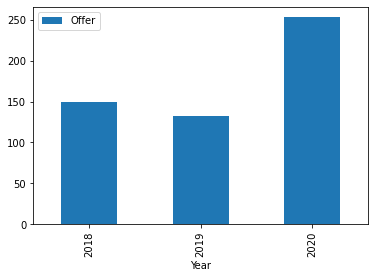

In [102]:
'''
Basic Chart/Plot

Show the number of total offers by year. Simple Bar Chart. There are many chart 'kinds' to experiment with
in your own reports.
'''

cs_offers.plot(kind='bar')

In [ ]:
top10_domicile = pd.DataFrame(data.groupby('Country')['Confirmed'].sum().nlargest(10).sort_values(ascending = False))
fig1 = px.scatter(top10_confirmed, x = top10_confirmed.index, y = 'Confirmed', size = 'Confirmed', size_max = 120,
                color = top10_confirmed.index, title = 'Top 10 Confirmed Cases Countries')
fig1.show()